In [35]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
file = 'volcanoes.csv'
df = pd.read_csv(file)

In [87]:
#df.head()

#df.info()

In [4]:
#Create Bins of Decades
bins = [1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2018]

group_names = ["1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s" ]

df["Decade"] = pd.cut(df["Year"], bins, labels=group_names)

In [116]:
#Value Counts

lst = ["Country", "Year", "Month", "Decade", "VEI", "Type", "TSU", "EQ"]

result = [df[x].value_counts() for x in lst]

#Which country had the most erputions over the 100 years?
total_erputs_country = result[0]

#What year had the most eruptions?
total_erupts_year = result[1]

#What month had the most eruptions? #change months from numbers to words - come back to this later!!!!
total_erupts_month = result[2]

#Eruptions by Decade
total_erupts_decade = result[3]

#Total eruptions per magnitude(VEI)?
total_erupts_VEI = result[4]

#Eruptions by type 
total_erupts_type = result[5]

#Tsunamis - A value of 'Tsu' would indicate that the volcano caused a tsunami.
total_erupts_tsu = result[6]

#EQs - A value of 'Eq' would indicate that there was a significant earthquake in conjunction with the volcanic eruption. 
eqs = result[7]

In [136]:
# Top 10 Rankings

rankings_by = ["VEI", "DAMAGE_MILLIONS_DOLLARS", "TOTAL_DEATHS"]

df1 = df[['Name', 'VEI', 'Location',"DAMAGE_MILLIONS_DOLLARS", "TOTAL_DEATHS" ]]
sort = [df1.sort_values(by=x, ascending=False) for x in rankings_by]


#Top 10 magnitude eruptions
top_10_mag = sort[0].head(10)

#DAMAGE_MILLIONS_DOLLARS (Specific Event)
top_10_damange = sort[1].head(10)

#Most deaths 
top_10_deaths = sort[2].head(10)

In [135]:
#Million Dollars of damage

column_list = ["Name", "Year", "Decade"]

damage_millions = df.loc[df['DAMAGE_MILLIONS_DOLLARS'] > 0]

groupby = [damage_millions.groupby(x)['DAMAGE_MILLIONS_DOLLARS'].sum() for x in column_list]

#Total damage by volcano
damage_volcano = groupby[0]

#Total damaage by year in millions
damage_year = groupby[1]

# Total Damange per decade 
damage_decade = groupby[2]

In [143]:
#Sums

sums_list = ["DAMAGE_MILLIONS_DOLLARS", "TOTAL_DEATHS"]

sums_final = [round(df[x].sum(),2) for x in sums_list]

# Total Damage (sum of individual damage)
total_damage = sums_final[0]

#Total Deaths 
total_deaths = sums_final[1]

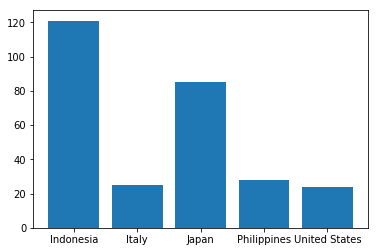

In [144]:
#Which countries had the most erputions over the 100 years?
total_erupts_country1 = total_erputs_country.head()

bar_chart = pd.DataFrame({"Country": total_erupts_country1.index, "Total Eruptions": total_erupts_country1}).reset_index()
del bar_chart["index"]
bar_chart.to_csv('eruptions_by_country_top_5.csv')

#Create Pie Chart
plt.bar(bar_chart["Country"], bar_chart["Total Eruptions"])
plt.show()

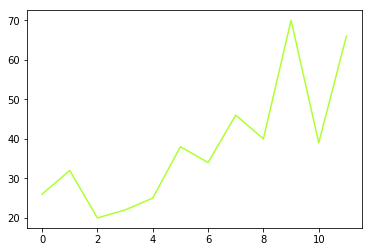

In [117]:
#Plot Eruptions per decade
new_df = pd.DataFrame({"Total Eruptions" : total_erupts_decade}).reset_index()
new_df1 = new_df.reindex([8,7,11,10,9,5,6,2,3,0,4,1])
df2 = new_df1.reset_index()
plt.plot(df2["Total Eruptions"], color='greenyellow')
plt.show()

del df2["level_0"]
df2.head()
df2.to_csv('eruptions_by_decade.csv')

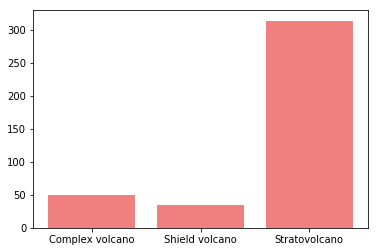

In [115]:
#Eruptions by type bar chart 
bar = total_erupts_type.head(3)
plt.bar(bar.index, bar, color ='lightcoral')
plt.show()